In [1]:
import pandas as pd
import numpy as np
from libs.simple_processing import separate_target

DATA = pd.read_csv('xor.csv', delimiter=';')

X, y = separate_target(DATA, 'y')

# class_names = ['00', '01', '10', '11']

print(X.shape)
print('y:', y.shape)


(4, 2)
y: (4,)


In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# patience below 7 cuts to early
early_stopping = EarlyStopping(
    min_delta=0.0005,  # minimium amount of change to count as an improvement
    patience=7,  # how many epochs to wait before stopping
    restore_best_weights=True,
)
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, random_state=40)

X_train = X.copy()
y_train = y.copy()
X_valid = X.copy()
y_valid = y.copy()

input_shape = [X_train.shape[1]]
print(input_shape)
print(X_train.shape)

[2]
(4, 2)


In [3]:
print(X_train)
print(y_train)

   x1  x2
0   0   0
1   0   1
2   1   0
3   1   1
0    0
1    1
2    1
3    0
Name: y, dtype: int64


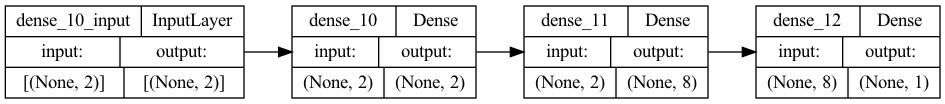

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Activation
# from tensorflow.keras import layers
from tensorflow.keras import activations

model = keras.Sequential()
model.add(layers.Dense(2, activation=Activation(activations.relu), input_shape=input_shape))
# model.add(layers.Flatten(input_shape=input_shape))
model.add(layers.Dense(8, activation=Activation(activations.relu)))
model.add(layers.Dense(1))

keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [32]:

accuracy = tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.5
)

model.compile(
    # optimizer='adam',
     loss='mae',
    # loss='mean_squared_error',
    # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # metrics=[accuracy]
    metrics=['binary_accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=4,# grupy danych
    epochs=450
    # ,callbacks=[early_stopping]
)
# print(model.summary())

# Generates pdf with network structure
# ann_viz(model, title="XOR")
# graph = Source.from_file('network.gv')
# graph

history_df = pd.DataFrame(history.history)
print("Minimum Validation Loss: {:0.5f}".format(history_df['val_loss'].min()));

Epoch 1/450


2022-12-01 19:30:29.139924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 4.7566 - binary_accuracy: 0.5000 - val_loss: 4.7136 - val_binary_accuracy: 0.5000
Epoch 2/450
1/1 [==============================] - 0s 62ms/step - loss: 4.7136 - binary_accuracy: 0.5000 - val_loss: 4.6826 - val_binary_accuracy: 0.5000
Epoch 3/450


2022-12-01 19:30:29.447982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 50ms/step - loss: 4.6826 - binary_accuracy: 0.5000 - val_loss: 4.6568 - val_binary_accuracy: 0.5000
Epoch 4/450
1/1 [==============================] - 0s 31ms/step - loss: 4.6568 - binary_accuracy: 0.5000 - val_loss: 4.6341 - val_binary_accuracy: 0.5000
Epoch 5/450
1/1 [==============================] - 0s 30ms/step - loss: 4.6341 - binary_accuracy: 0.5000 - val_loss: 4.6133 - val_binary_accuracy: 0.5000
Epoch 6/450
1/1 [==============================] - 0s 31ms/step - loss: 4.6133 - binary_accuracy: 0.5000 - val_loss: 4.5939 - val_binary_accuracy: 0.5000
Epoch 7/450
1/1 [==============================] - 0s 29ms/step - loss: 4.5939 - binary_accuracy: 0.5000 - val_loss: 4.5757 - val_binary_accuracy: 0.5000
Epoch 8/450
1/1 [==============================] - 0s 30ms/step - loss: 4.5757 - binary_accuracy: 0.5000 - val_loss: 4.5582 - val_binary_accuracy: 0.5000
Epoch 9/450
1/1 [==============================] - 0s 24ms/step - loss: 4.5582 - binary_

In [28]:
print(int(model.predict(np.array([[0, 1]]))))
print(model.predict(np.array([[0, 1]])))


1/1 [==============================] - 0s 14ms/step
-5
1/1 [==============================] - 0s 12ms/step
[[-5.681402]]


weights:  [[ 0.04757896  0.69323766  0.49377072  0.5555716  -0.37558532  0.22841941
   0.55715024  0.67320645]
 [ 0.63070005 -0.23502812  0.35738727 -0.8802934  -0.6858322  -0.14399374
  -0.8802146  -0.57518524]]
biases:  [-4.4502180e-02  9.5919124e-05  2.2936973e-01 -2.6172181e-03
  0.0000000e+00  2.2141884e-01 -2.2290740e-04 -5.1573571e-04]


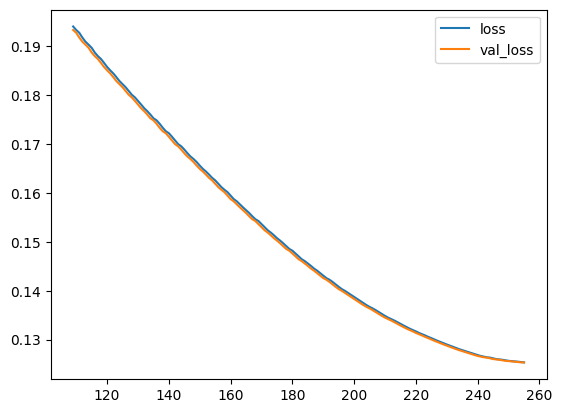

In [7]:
history_df.loc[109:, ['loss', 'val_loss']].plot()
weights = model.layers[1].get_weights()[0]
biases = model.layers[1].get_weights()[1]
print('weights: ', weights)
print('biases: ', biases)

In [8]:
# Change 'relu' to 'elu', 'selu', 'swish', sigmoid... or something else
# How different activation functions look like

import tensorflow as tf
import matplotlib.pyplot as plt

# print(tf.__version__)

activation_layer = layers.Activation('max_pool')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x)  # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

ValueError: Unknown activation function: max_pool. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.